<a href="https://colab.research.google.com/github/bilaldadanlar/test_repo/blob/master/binbin%20case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief:

### Ekli dosyalarda bulunan datalar ile ilgili bilgiler aşağıda yer almaktadır. 
### Serbest bir analiz raporlaması ile çıkacak özet raporda kullandığınız metodolojileri ve ölçmek istediğiniz KPI'ları belirtmenizi rica ederiz. 
### Analiz raporunuzu 25.01.2022 tarihine kadar bekliyoruz.

### 1.Data: İstanbul Avrupa yakasında bulunan Scooterların 1 aylık sürüş performansı,

### 2.Data: İstanbul Avrupa yakasında son 1 ayda uygulamaya kayıt olan kullanıcıların sürüş ve harcama performansları.

# Bilal: Çıkarımları kod aralarındaki # ile başlayan yorum satırlarında belirttim. Çıktılarda bariz görünen bazı temel çıkarımlar ("kullanıcıların %75 inin 29 yaş ve altı olması" vb) veya tek başına çok şey anlatmayan grafik ve veriler hakkında yorum yazmadım.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## veri okuma, temel istatistikler, verinin davranışına genel bakış

In [ ]:
ride = pd.read_excel("1.Data (1).xlsx")
ride

,Başlangıç Zamanı,Bitiş Zamanı,Başlangıç Konumu,Bitiş Konumu,ScooterID,UserID
0,2021-11-15 00:00:04.317,2021-11-15 00:01:15.197,"41.014797, 28.927984","41.014812, 28.927879",3033,119873
1,2021-11-15 00:00:42.177,2021-11-15 00:10:54.657,"41.076351, 29.043524","41.077778, 29.039013",6650,610523
2,2021-11-15 00:00:49.680,2021-11-15 00:14:36.843,"41.014912, 28.96862","41.024517, 28.946455",4695,71004
3,2021-11-15 00:01:40.610,2021-11-15 00:11:31.937,"41.01965, 28.942835","41.00993, 28.948132",7132,204980
4,2021-11-15 00:01:51.997,2021-11-15 00:14:41.080,"41.033928, 28.9778","41.0317, 28.984358",6559,759433
...,...,...,...,...,...,...
148715,2021-12-16 19:33:24.293,NaN,"41.00555, 28.952545",NaN,4749,211329
148716,2021-12-16 19:33:48.020,NaN,"41.017658, 28.956701",NaN,7421,616374
148717,2021-12-16 19:33:51.160,NaN,"41.013115, 28.949432",NaN,2959,168018
148718,2021-12-16 19:33:54.410,NaN,"41.016605, 28.948627",NaN,6907,531596


In [ ]:
ride.ScooterID = ride.ScooterID.astype("str")
ride.UserID = ride.UserID.astype("str")


In [ ]:
ride.describe(include="all").T

,count,unique,top,freq
Başlangıç Zamanı,148720,148638,2021-12-05 16:31:26.023,2
Bitiş Zamanı,148684,148597,2021-11-21 14:22:31.257,2
Başlangıç Konumu,148720,145650,"41.02103, 28.89846",16
Bitiş Konumu,148684,145252,"41.02103, 28.89846",25
ScooterID,148720,1700,2798,704
UserID,148720,30253,486422,184


In [ ]:
user = pd.read_excel("2.Data (1).xlsx")
user.UserID = user.UserID.astype("str")
user

,UserID,Yaş,Cinsiyet,Cihaz Türü,App Sürümü,Sürüş Sayısı,Cüzdandaki Tutar,Harcama Tutarı
0,823713,18,Erkek,samsung - SM-A515F,58,1,6.95,33.05
1,823914,24,Bilinmiyor,"Apple - iPhone9,3",58,0,0.00,0.00
2,823982,33,Erkek,Xiaomi - M2102J20SG,58,1,11.69,28.31
3,824100,16,Bilinmiyor,"Apple - iPhone12,8",58,2,1.77,43.23
4,824249,17,Erkek,Xiaomi - Redmi Note 8,58,1,0.00,95.86
...,...,...,...,...,...,...,...,...
7834,892001,54,Erkek,Xiaomi - M2101K6R,58,1,0.00,328.70
7835,892200,21,Erkek,samsung - SM-N960F,58,0,0.00,0.00
7836,892535,31,Erkek,"Apple - iPhone11,2",58,1,0.00,21.39
7837,892718,21,Bilinmiyor,"Apple - iPhone12,1",58,2,0.00,23.78


## son 1 aydaki kayıtlar sürüşlerin ne kadarını oluşturuyor?

In [ ]:
# son 1 ayda kayıt olanlar 8882 sürüş yapmış. 1 aylık toplam sürüşe (148K) oranı yaklaşık: %6 

ride[ride.UserID.isin(user.UserID)] 

,Başlangıç Zamanı,Bitiş Zamanı,Başlangıç Konumu,Bitiş Konumu,ScooterID,UserID
120,2021-11-15 00:41:19.317,2021-11-15 00:55:41.407,"41.042675, 29.00798","41.050934, 29.008787",7162,823725
220,2021-11-15 01:28:22.080,2021-11-15 01:46:19.413,"41.020798, 28.959719","41.007835, 28.931156",4684,823762
270,2021-11-15 01:57:38.000,2021-11-15 02:10:13.267,"41.072041, 29.044962","41.083286, 29.056835",2829,823818
289,2021-11-15 02:15:50.377,2021-11-15 02:51:50.207,"41.079571, 29.049191","41.079533, 29.049105",6543,823834
292,2021-11-15 02:17:37.977,2021-11-15 02:30:28.963,"41.083282, 29.056837","41.067856, 29.046049",2829,823818
...,...,...,...,...,...,...
148597,2021-12-16 19:05:54.270,2021-12-16 19:16:19.330,"41.013382, 28.953741","41.011559, 28.941933",4632,829498
148614,2021-12-16 19:10:27.330,2021-12-16 19:15:16.640,"41.004292, 28.943811","41.006176, 28.950827",2977,880659
148685,2021-12-16 19:27:01.333,NaN,"41.010063, 28.955465",NaN,2389,892824
148707,2021-12-16 19:31:39.933,NaN,"41.016098, 28.941168",NaN,2663,865234


In [ ]:
# sürüşteki 30253 benzersiz kullanıcıdan 3264 ü son 1 ayda üye olmuş. yaklaşık %11
# aylık yüksek bir büyüme oranı veya toplam kullanıcıların sadık olmaması (veya seyrek kullanması) anlamına gelebilir.

ride.UserID.unique(), user.UserID.unique()
np.intersect1d(ride.UserID.unique(), user.UserID.unique()).size

3264

In [ ]:
user.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserID,7839,7839,823713,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yaş,7839.0,NaN,NaN,NaN,25.575711,8.36714,15.0,20.0,23.0,29.0,80.0
Cinsiyet,7839,3,Erkek,4373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cihaz Türü,7839,419,"Apple - iPhone12,1",1296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
App Sürümü,7839.0,NaN,NaN,NaN,58.00051,0.027663,58.0,58.0,58.0,58.0,60.0
Sürüş Sayısı,7839.0,NaN,NaN,NaN,1.617936,3.2224,0.0,0.0,1.0,2.0,80.0
Cüzdandaki Tutar,7839.0,NaN,NaN,NaN,3.651477,12.56033,0.0,0.0,0.0,0.0,531.21
Harcama Tutarı,7839.0,NaN,NaN,NaN,80.13397,468.800006,-3.0,0.0,12.67,42.585,10974.0


## sürüş ve harcamada cinsiyetin etkisi nasıl?

In [ ]:
user.columns

Index(['UserID', 'Yaş', 'Cinsiyet', 'Cihaz Türü', 'App Sürümü', 'Sürüş Sayısı',
       'Cüzdandaki Tutar', 'Harcama Tutarı'],
      dtype='object')

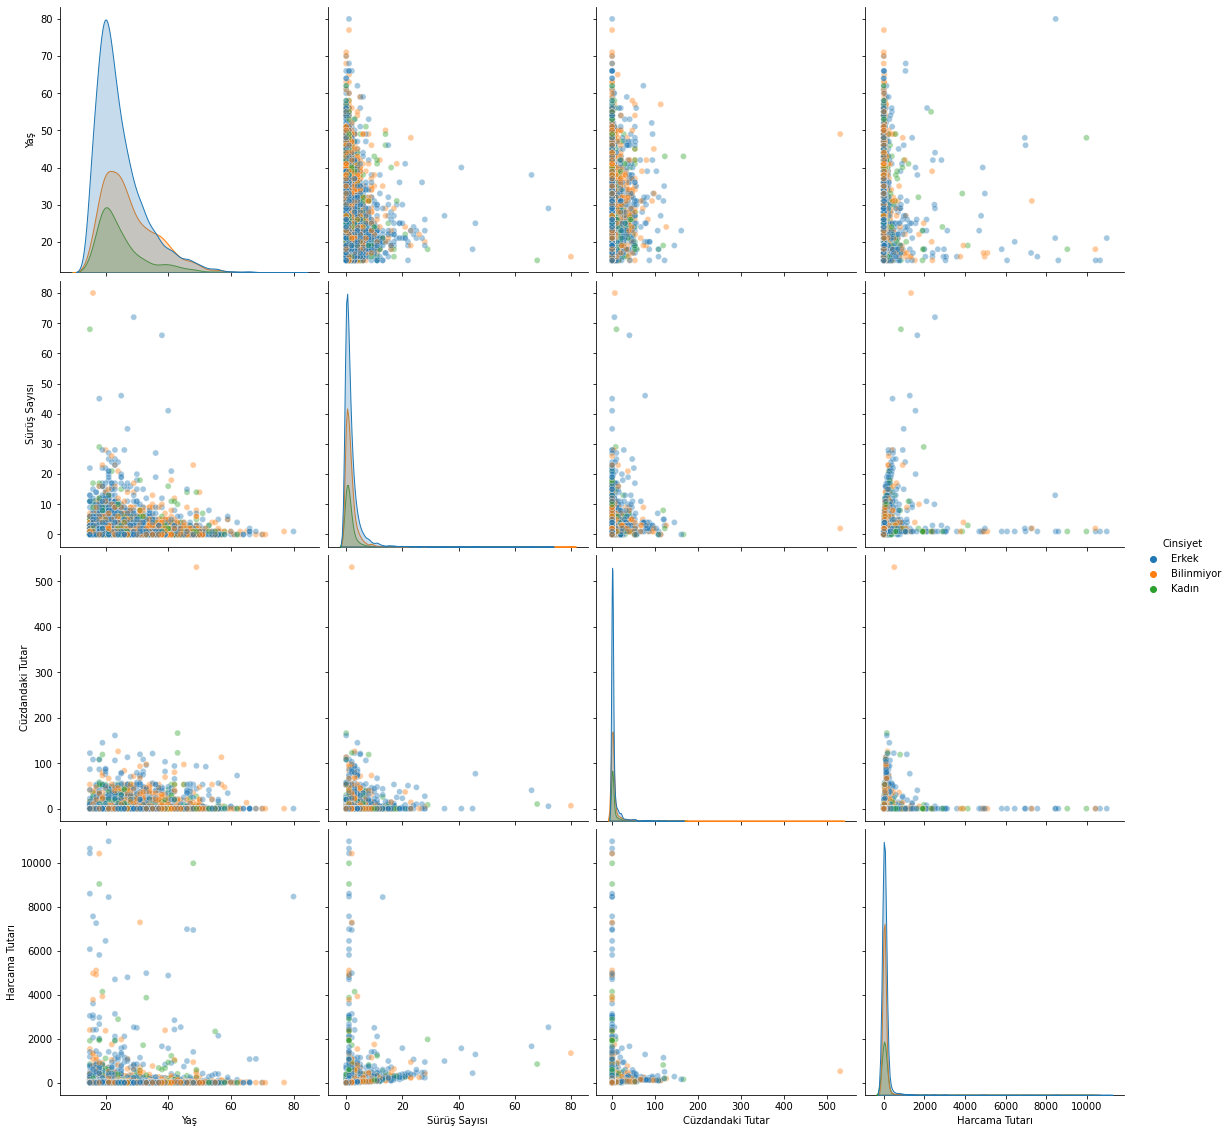

In [ ]:
sns.pairplot(user[['Yaş', 'Cinsiyet', 'Sürüş Sayısı','Cüzdandaki Tutar', 'Harcama Tutarı']], 
                    hue="Cinsiyet",  height=4, plot_kws=dict(alpha=0.4))

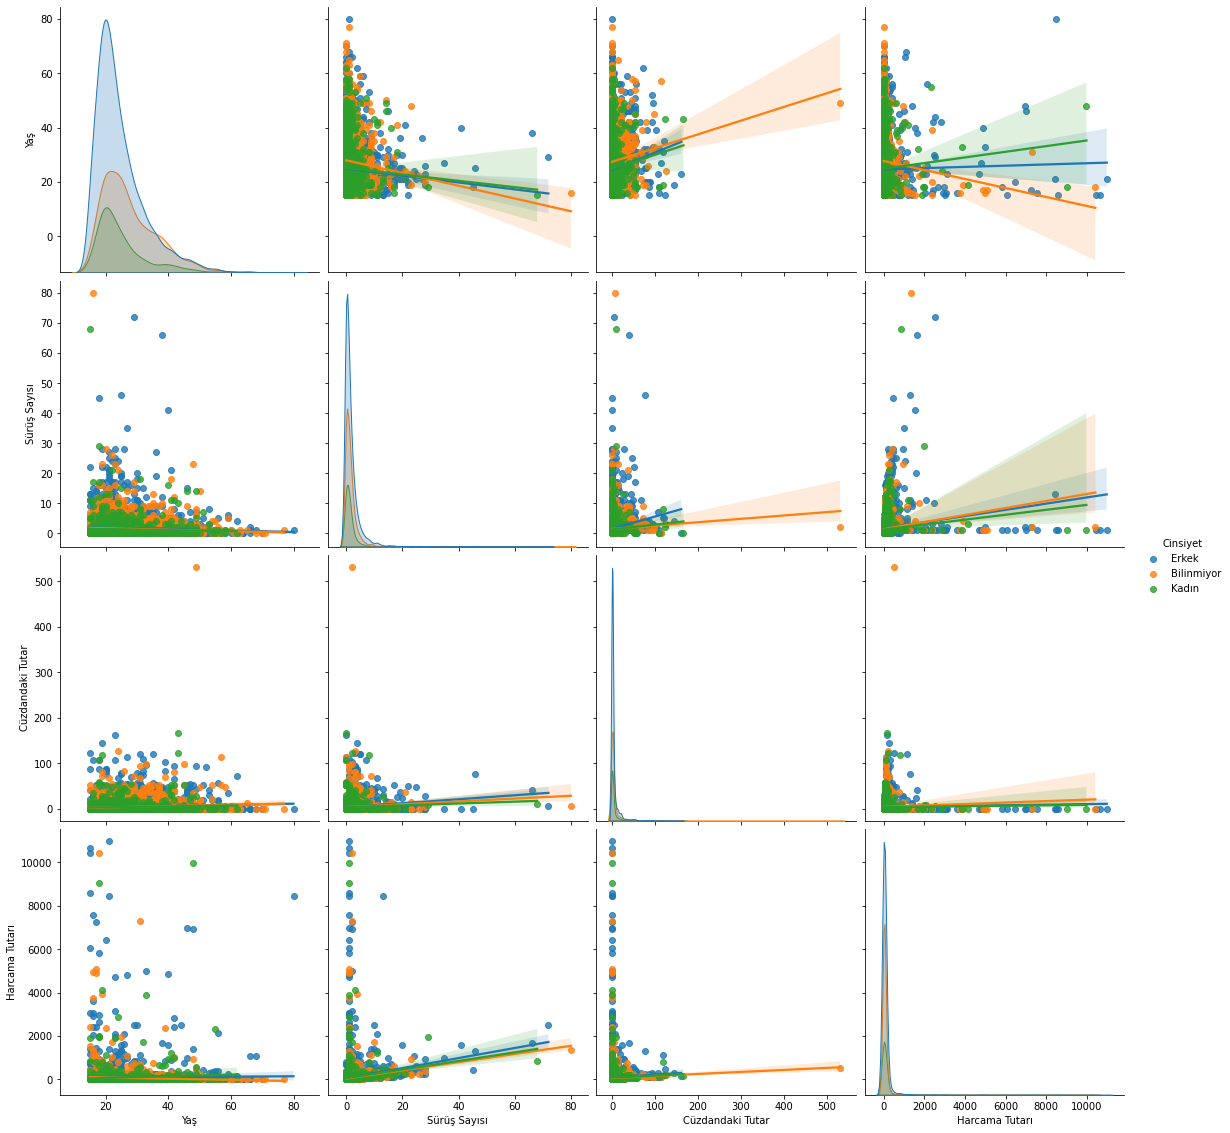

In [ ]:
# aynı eğilimin regresyon doğrularıyla incelenmesi:
# farklı cinsiyet türlerinde: yaş arttıkça harcamada çok farklı davranışlar var. (sağ üst köşedeki grafik).
# kadın ve erkek benzer sayıda sürüş yaparak farklı harcama davranışı gösteriyor. cinsiyeti bilinmeyenlerde sürüş sayısı da farklı (ilk sırada soldan 2. grafik)

sns.pairplot(user[['Yaş', 'Cinsiyet', 'Sürüş Sayısı','Cüzdandaki Tutar', 'Harcama Tutarı']], 
                    hue="Cinsiyet",  height=4, kind="reg")

<AxesSubplot:xlabel='Cinsiyet', ylabel='Harcama Tutarı'>

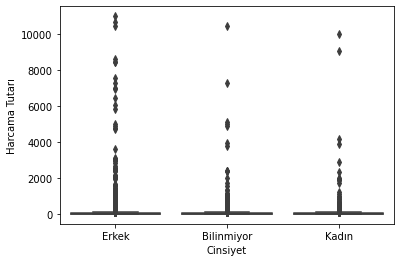

In [ ]:
sns.boxplot(data=user, x="Cinsiyet", y="Harcama Tutarı")

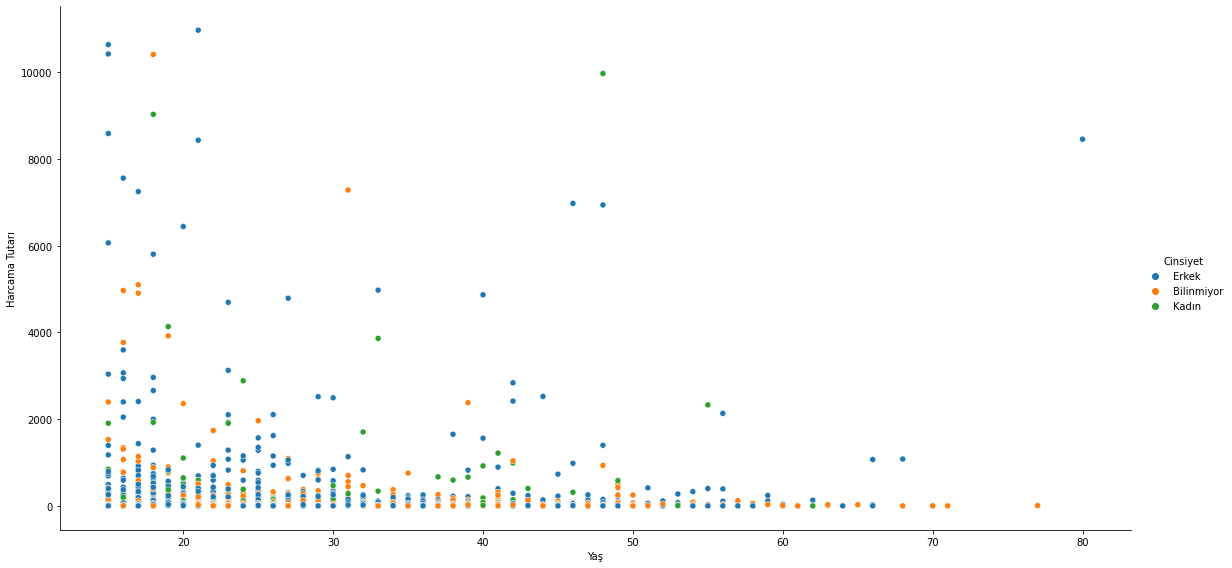

In [ ]:
sns.relplot(data=user, y="Harcama Tutarı", x="Yaş", hue="Cinsiyet", height=8, aspect=2)

Text(0.5, 1.0, 'Cinsiyetlerin hangi yaşta kaçar kullanıcısı var')

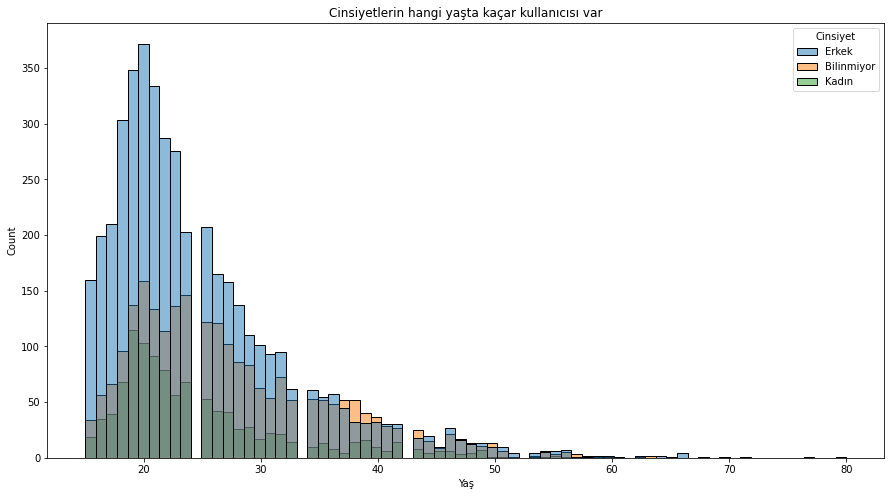

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=user, x="Yaş", hue="Cinsiyet").set_title("Cinsiyetlerin hangi yaşta kaçar kullanıcısı var")

In [ ]:
# 3 cinsiyet için ortalama değerler

user.groupby("Cinsiyet").mean()

,Yaş,App Sürümü,Sürüş Sayısı,Cüzdandaki Tutar,Harcama Tutarı
Cinsiyet,,,,,
Bilinmiyor,27.588507,58.001258,1.528523,3.791338,63.212085
Erkek,24.641207,58.000229,1.727876,3.641338,89.083016
Kadın,24.917745,58.000000,1.370610,3.384298,81.250046


In [ ]:
# cinsiyetini girmeyenler daha yaşlı. Özellikle 23 yaşın üzerinde cinsiyet belirtmeyen bir kitle var.

<AxesSubplot:title={'center':'Cinsiyete göre ortalama harcama tutarı'}, xlabel='Cinsiyet'>

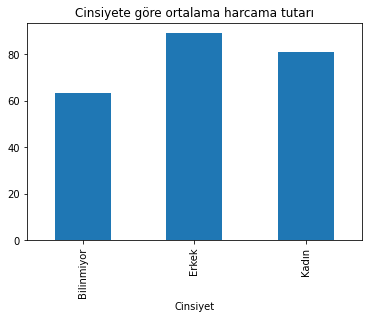

In [ ]:
# erkekler ortalamadan daha fazla harcama yapıyor, cinsiyeti bilinmeyenler daha az harcama yapıyor.

user.groupby("Cinsiyet").mean()["Harcama Tutarı"].plot.bar(title="Cinsiyete göre ortalama harcama tutarı")

<AxesSubplot:title={'center':'Cinsiyete göre ortalama sürüş sayısı'}, xlabel='Cinsiyet'>

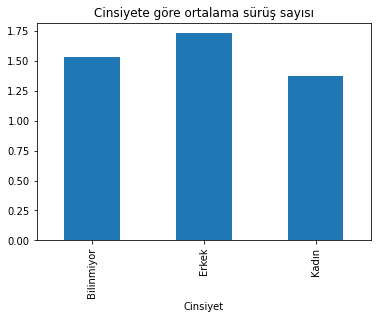

In [ ]:
user.groupby("Cinsiyet").mean()["Sürüş Sayısı"].plot.bar(title="Cinsiyete göre ortalama sürüş sayısı")

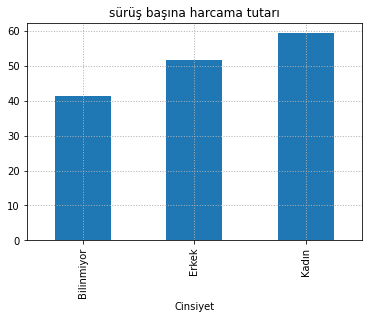

In [ ]:
# kadınlarda sürüş başına harcama tutarı daha yüksek. Fazla sürat yapmadıkları için olabilir. Sürüş mesafesi/süresi hesaplanarak incelenmeli.

plt.title("sürüş başına harcama tutarı")
(user.groupby("Cinsiyet").mean()["Harcama Tutarı"] / user.groupby("Cinsiyet").mean()["Sürüş Sayısı"]).plot.bar()
plt.grid(True, linestyle=":", linewidth=1)
plt.show()

## Sürüşlerde mevsimsel (günün saati ve haftanın günü) etki nasıl?

In [ ]:
ride

,Başlangıç Zamanı,Bitiş Zamanı,Başlangıç Konumu,Bitiş Konumu,ScooterID,UserID
0,2021-11-15 00:00:04.317,2021-11-15 00:01:15.197,"41.014797, 28.927984","41.014812, 28.927879",3033,119873
1,2021-11-15 00:00:42.177,2021-11-15 00:10:54.657,"41.076351, 29.043524","41.077778, 29.039013",6650,610523
2,2021-11-15 00:00:49.680,2021-11-15 00:14:36.843,"41.014912, 28.96862","41.024517, 28.946455",4695,71004
3,2021-11-15 00:01:40.610,2021-11-15 00:11:31.937,"41.01965, 28.942835","41.00993, 28.948132",7132,204980
4,2021-11-15 00:01:51.997,2021-11-15 00:14:41.080,"41.033928, 28.9778","41.0317, 28.984358",6559,759433
...,...,...,...,...,...,...
148715,2021-12-16 19:33:24.293,NaN,"41.00555, 28.952545",NaN,4749,211329
148716,2021-12-16 19:33:48.020,NaN,"41.017658, 28.956701",NaN,7421,616374
148717,2021-12-16 19:33:51.160,NaN,"41.013115, 28.949432",NaN,2959,168018
148718,2021-12-16 19:33:54.410,NaN,"41.016605, 28.948627",NaN,6907,531596


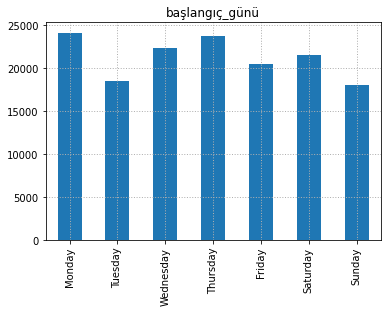

In [ ]:
# haftalık mevsimsel etkideki dağılım, iş mesaisinin trafiğe etkisine benziyor.

ride["Başlangıç Günü"] = pd.to_datetime(ride["Başlangıç Zamanı"]).dt.day_name()
başlangıç_günü = pd.Categorical(ride["Başlangıç Günü"], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("başlangıç_günü")

başlangıç_günü.value_counts().plot.bar()
plt.grid(True, linestyle=":", linewidth=1)
plt.show()


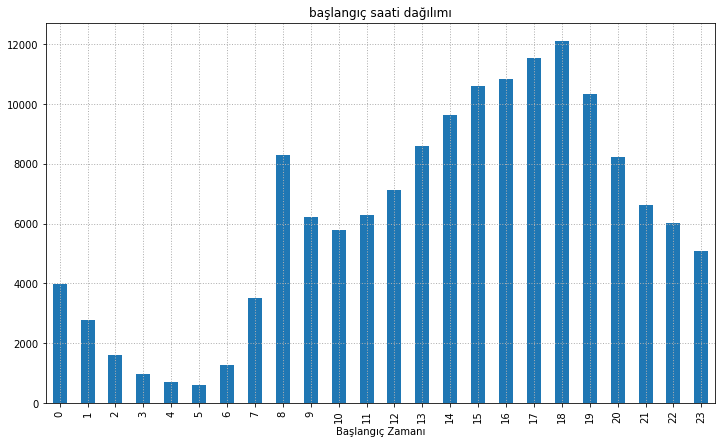

In [ ]:
# saatlerin dağılımı da işe gitmek için kullanan bir grup olduğunu doğruluyor.

baş_saatleri = pd.to_datetime(ride["Başlangıç Zamanı"])
plt.figure(figsize=(12,7))
ride.groupby([baş_saatleri.dt.hour]).UserID.count().plot.bar()#.created_at.sum()

plt.title("başlangıç saati dağılımı")
plt.grid(True, linestyle=":", linewidth=1)
plt.show()

In [ ]:
# son 1 aydakilerin yaptığı sürüşlerde yaşın kullanım vaktine etkisi incelenebilir.

user_ride = pd.merge(right=user, left=ride, on="UserID")
user_ride

,Başlangıç Zamanı,Bitiş Zamanı,Başlangıç Konumu,Bitiş Konumu,ScooterID,UserID,Başlangıç Günü,Yaş,Cinsiyet,Cihaz Türü,App Sürümü,Sürüş Sayısı,Cüzdandaki Tutar,Harcama Tutarı
0,2021-11-15 00:41:19.317,2021-11-15 00:55:41.407,"41.042675, 29.00798","41.050934, 29.008787",7162,823725,Monday,18,Bilinmiyor,"Apple - iPhone11,8",58,1,6.16,33.84
1,2021-11-15 01:28:22.080,2021-11-15 01:46:19.413,"41.020798, 28.959719","41.007835, 28.931156",4684,823762,Monday,20,Bilinmiyor,"Apple - iPhone12,1",58,1,0.00,16.21
2,2021-11-15 01:57:38.000,2021-11-15 02:10:13.267,"41.072041, 29.044962","41.083286, 29.056835",2829,823818,Monday,26,Erkek,"Apple - iPhone8,1",58,3,0.00,69.26
3,2021-11-15 02:17:37.977,2021-11-15 02:30:28.963,"41.083282, 29.056837","41.067856, 29.046049",2829,823818,Monday,26,Erkek,"Apple - iPhone8,1",58,3,0.00,69.26
4,2021-12-05 19:56:09.027,2021-12-05 20:54:27.097,"41.107857, 29.058218","41.139053, 29.05444",4644,823818,Sunday,26,Erkek,"Apple - iPhone8,1",58,3,0.00,69.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,2021-12-16 18:19:31.583,2021-12-16 18:20:01.450,"41.012215, 28.959726","41.012249, 28.959728",10879,892718,Thursday,21,Bilinmiyor,"Apple - iPhone12,1",58,2,0.00,23.78
8878,2021-12-16 18:18:52.873,2021-12-16 18:24:42.447,"41.038681, 28.996742","41.041328, 29.003378",4671,892739,Thursday,28,Bilinmiyor,"Apple - iPhone12,1",58,1,0.00,8.93
8879,2021-12-16 18:49:21.473,2021-12-16 18:57:56.897,"41.008991, 28.969505","41.011391, 28.948835",9637,880037,Thursday,25,Bilinmiyor,"Apple - iPhone10,6",58,1,0.00,10.90
8880,2021-12-16 19:05:54.270,2021-12-16 19:16:19.330,"41.013382, 28.953741","41.011559, 28.941933",4632,829498,Thursday,20,Erkek,Xiaomi - Mi Note 10,58,1,0.00,11.59


In [ ]:
user_ride[user_ride["Yaş"]<23]

,Başlangıç Zamanı,Bitiş Zamanı,Başlangıç Konumu,Bitiş Konumu,ScooterID,UserID,Başlangıç Günü,Yaş,Cinsiyet,Cihaz Türü,App Sürümü,Sürüş Sayısı,Cüzdandaki Tutar,Harcama Tutarı
0,2021-11-15 00:41:19.317,2021-11-15 00:55:41.407,"41.042675, 29.00798","41.050934, 29.008787",7162,823725,Monday,18,Bilinmiyor,"Apple - iPhone11,8",58,1,6.16,33.84
1,2021-11-15 01:28:22.080,2021-11-15 01:46:19.413,"41.020798, 28.959719","41.007835, 28.931156",4684,823762,Monday,20,Bilinmiyor,"Apple - iPhone12,1",58,1,0.00,16.21
8,2021-11-15 08:50:56.177,2021-11-15 09:03:32.867,"41.018337, 28.970524","41.022038, 28.975004",6730,823919,Monday,16,Erkek,"Apple - iPhone12,1",58,4,0.00,57.73
9,2021-11-15 09:56:31.867,2021-11-15 10:04:53.360,"41.034824, 28.984591","41.02858, 28.974182",6539,823919,Monday,16,Erkek,"Apple - iPhone12,1",58,4,0.00,57.73
10,2021-11-15 15:07:33.857,2021-11-15 15:23:50.897,"41.040779, 28.986246","41.028599, 28.973776",4734,823919,Monday,16,Erkek,"Apple - iPhone12,1",58,4,0.00,57.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874,2021-12-16 17:30:47.440,2021-12-16 17:33:52.890,"41.063732, 28.991659","41.06625, 28.994665",2510,892644,Thursday,22,Bilinmiyor,"Apple - iPhone11,8",58,2,7.11,32.89
8875,2021-12-16 17:55:15.663,2021-12-16 17:56:29.407,"41.063007, 28.990332","41.063072, 28.990131",2373,825191,Thursday,20,Erkek,"Apple - iPhone12,3",58,1,0.00,3.97
8876,2021-12-16 18:00:08.323,2021-12-16 18:18:57.073,"41.01236, 28.959923","41.012215, 28.959726",10879,892718,Thursday,21,Bilinmiyor,"Apple - iPhone12,1",58,2,0.00,23.78
8877,2021-12-16 18:19:31.583,2021-12-16 18:20:01.450,"41.012215, 28.959726","41.012249, 28.959728",10879,892718,Thursday,21,Bilinmiyor,"Apple - iPhone12,1",58,2,0.00,23.78


C:\Users\bilal\AppData\Local\Temp\ipykernel_13532\3324386295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incele["Başlangıç Günü"] = pd.to_datetime(incele["Başlangıç Zamanı"]).dt.day_name()


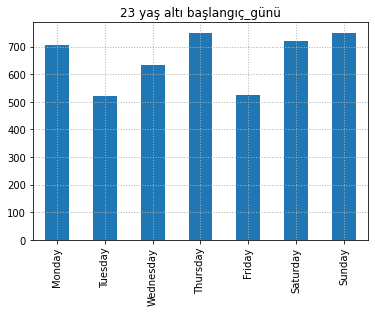

In [ ]:
# örneğin 23 yaşından küçükler verinin yarısını oluşturuyor (4607/8880) ve haftalık kullanım davranışı farklı
# haftasonları pazartesiden daha fazla kullanıyor.

incele = user_ride[user_ride["Yaş"]<23]

incele["Başlangıç Günü"] = pd.to_datetime(incele["Başlangıç Zamanı"]).dt.day_name()
ur_başlangıç_günü = pd.Categorical(incele["Başlangıç Günü"], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("23 yaş altı başlangıç_günü")

ur_başlangıç_günü.value_counts().plot.bar()
plt.grid(True, linestyle=":", linewidth=1)
plt.show()

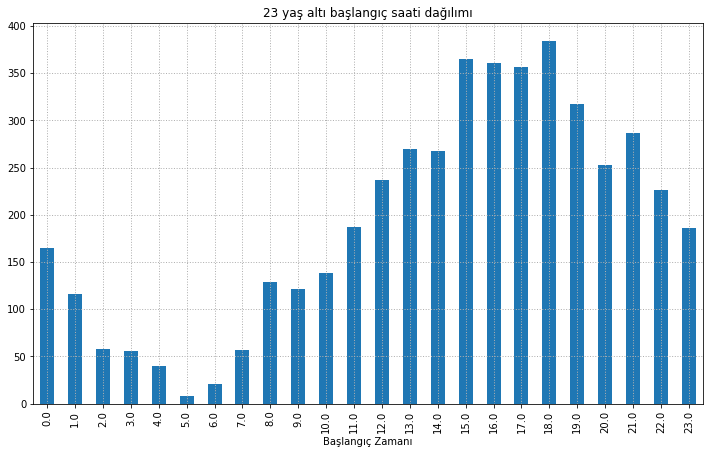

In [ ]:
# 23 yaş altı gün içinde kullanım zamanları da farklı. 
# sabah 8 de yoğun kullanım yok. saatler arasında (tüm verideki gibi) sert değişim görünmüyor.

incele = user_ride[user_ride["Yaş"]<23]

ur_baş_saatleri = pd.to_datetime(incele["Başlangıç Zamanı"])
plt.figure(figsize=(12,7))
ride.groupby([ur_baş_saatleri.dt.hour]).UserID.count().plot.bar()#.created_at.sum()

plt.title("23 yaş altı başlangıç saati dağılımı")
plt.grid(True, linestyle=":", linewidth=1)
plt.show()

## mobil cihazın harcamaya etkisi?

In [ ]:
user

,UserID,Yaş,Cinsiyet,Cihaz Türü,App Sürümü,Sürüş Sayısı,Cüzdandaki Tutar,Harcama Tutarı
0,823713,18,Erkek,samsung - SM-A515F,58,1,6.95,33.05
1,823914,24,Bilinmiyor,"Apple - iPhone9,3",58,0,0.00,0.00
2,823982,33,Erkek,Xiaomi - M2102J20SG,58,1,11.69,28.31
3,824100,16,Bilinmiyor,"Apple - iPhone12,8",58,2,1.77,43.23
4,824249,17,Erkek,Xiaomi - Redmi Note 8,58,1,0.00,95.86
...,...,...,...,...,...,...,...,...
7834,892001,54,Erkek,Xiaomi - M2101K6R,58,1,0.00,328.70
7835,892200,21,Erkek,samsung - SM-N960F,58,0,0.00,0.00
7836,892535,31,Erkek,"Apple - iPhone11,2",58,1,0.00,21.39
7837,892718,21,Bilinmiyor,"Apple - iPhone12,1",58,2,0.00,23.78


In [ ]:
# 419 farklı cihazın ortalama "sürüş sayısı", "harcama tutarı", "cüzdan tutarı" nda belirgin bir değişime sebep olduğu görülüyor. 
# çünkü standart sapmaları ortalamalarına göre yüksek

user[user["Harcama Tutarı"]>0].groupby("Cihaz Türü").mean().describe().T

,count,mean,std,min,25%,50%,75%,max
Yaş,337.0,25.925061,6.515486,15.0,21.00,25.00,29.333333,48.000000
App Sürümü,337.0,58.000015,0.000281,58.0,58.00,58.00,58.000000,58.005155
Sürüş Sayısı,337.0,2.119565,2.478077,0.0,1.00,1.75,2.652778,29.000000
Cüzdandaki Tutar,337.0,5.139079,8.863221,0.0,0.00,2.19,6.241333,57.475000
Harcama Tutarı,337.0,96.640613,221.011150,1.0,18.86,43.28,84.923472,2802.702500


In [ ]:
user[user["Harcama Tutarı"]>0].describe().T

,count,mean,std,min,25%,50%,75%,max
Yaş,5236.0,25.181627,8.075459,15.00,20.00,23.000,29.00,80.00
App Sürümü,5236.0,58.000191,0.013820,58.00,58.00,58.000,58.00,59.00
Sürüş Sayısı,5236.0,2.422078,3.687694,0.00,1.00,1.000,3.00,80.00
Cüzdandaki Tutar,5236.0,5.258581,15.083543,0.00,0.00,0.000,4.58,531.21
Harcama Tutarı,5236.0,119.975017,569.447361,0.29,12.67,30.935,67.96,10974.00


In [ ]:
# (Harcama yapanlar arasında) Harcama ortalaması en yüksek 30 cihaz: 
# en tepedeki birkaç cihazın bu veride çok az kullanıcısı olduğu için ortalamayı yükseltmiş olabilir. 
# Dolayısıyla belli bir kullanıcı sayısına sahip cihazları (veya tüm verideki etkiyi) değerlendirmekte fayda var.
# Fakar iphone 10, 14 gibi çok kullanıcılı cihazların genel ortalama (96) dan 3.5 kat fazla daha fazla harcadığı görülüyor.

user[user["Harcama Tutarı"]>0].groupby("Cihaz Türü").mean().sort_values("Harcama Tutarı", ascending=False).head(30)

,Yaş,App Sürümü,Sürüş Sayısı,Cüzdandaki Tutar,Harcama Tutarı
Cihaz Türü,,,,,
OPPO - CPH1941,26.750000,58.0,2.000000,5.000000,2802.702500
Reeder - P13 Blue Max PL,18.000000,58.0,29.000000,8.240000,1967.760000
Sony - G3121,23.000000,58.0,3.000000,0.000000,1076.620000
samsung - SM-A225F,24.666667,58.0,4.000000,0.000000,841.346667
OPPO - CPH2113,21.000000,58.0,1.500000,1.540000,788.020000
Xiaomi - M2101K7BG,24.142857,58.0,2.821429,7.926071,672.420357
Xiaomi - Redmi Note 6 Pro,20.833333,58.0,1.333333,0.931667,659.213333
LGE - LG-H815,33.500000,58.0,5.500000,0.185000,611.140000
Xiaomi - Redmi Note 8,24.492754,58.0,2.086957,3.698841,566.632464


In [ ]:
# Harcama ortalaması en düşük 25 cihaz:
user[user["Harcama Tutarı"]>0].groupby("Cihaz Türü").mean().sort_values("Harcama Tutarı").head(25)

,Yaş,App Sürümü,Sürüş Sayısı,Cüzdandaki Tutar,Harcama Tutarı
Cihaz Türü,,,,,
Xiaomi - Mi 9 Lite,28.0,58.0,0.0,0.0,1.000
HTC - HTC U20 5G,35.0,58.0,0.0,5.0,1.000
samsung - SM-N9860,42.0,58.0,0.0,0.0,1.000
HUAWEI - LDN-L21,16.0,58.0,0.0,0.0,1.000
INFINIX MOBILITY LIMITED - Infinix X650C,15.0,58.0,0.0,0.0,1.000
LGE - LM-Q630,34.0,58.0,0.0,0.0,1.000
Xiaomi - Redmi Note 5,39.0,58.0,0.0,0.0,1.000
reeder - P13 Blue MaxL 2022,44.0,58.0,0.0,0.0,1.000
samsung - SM-A260F,35.0,58.0,0.0,0.0,1.000
